In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

data = pd.read_csv('air_passenger.csv')
data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:

data['year'] = pd.DatetimeIndex(data['Month']).year

data['month'] = pd.DatetimeIndex(data['Month']).month

In [4]:
data

,Month,Passengers,year,month
0,1949-01,112,1949,1
1,1949-02,118,1949,2
2,1949-03,132,1949,3
3,1949-04,129,1949,4
4,1949-05,121,1949,5
...,...,...,...,...
139,1960-08,606,1960,8
140,1960-09,508,1960,9
141,1960-10,461,1960,10
142,1960-11,390,1960,11


In [5]:

data.drop(['Month'],axis=1,inplace=True)

Text(0, 0.5, 'No. of Passengers')

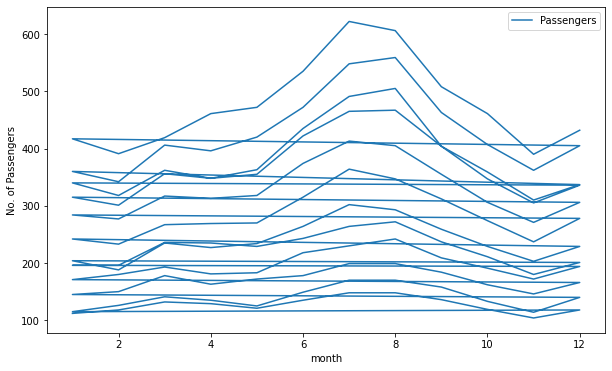

In [6]:

data.plot(x='month',y='Passengers',figsize=(10,6))
plt.xlabel('month')
plt.ylabel('No. of Passengers')

Text(0, 0.5, 'No. of Passengers')

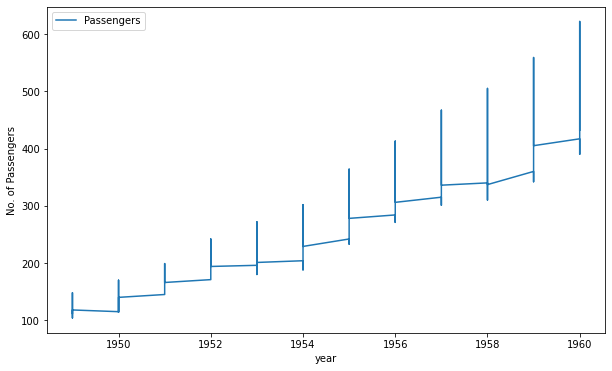

In [7]:

data.plot(x='year',y='Passengers',figsize=(10,6))
plt.xlabel('year')
plt.ylabel('No. of Passengers')

Text(0, 0.5, 'No. of Passengers')

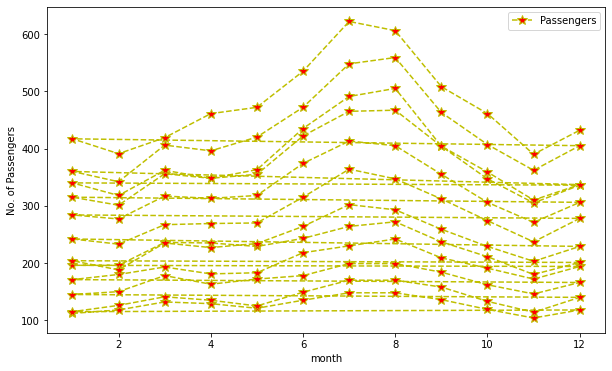

In [8]:

data.plot(x='month',y='Passengers',figsize=(10,6),linestyle='--', marker='*', 
          markerfacecolor='r',color='y',markersize=10)
plt.xlabel('month')
plt.ylabel('No. of Passengers')

Text(0, 0.5, 'No. of Passengers')

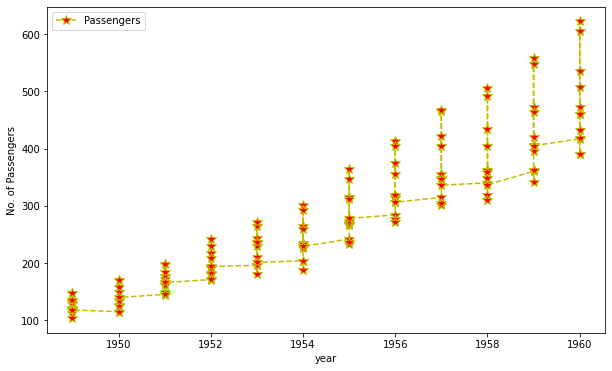

In [9]:
data.plot(x='year',y='Passengers',figsize=(10,6),linestyle='--', marker='*', markerfacecolor='r',color='y',markersize=10)
plt.xlabel('year')
plt.ylabel('No. of Passengers')

Lag Plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

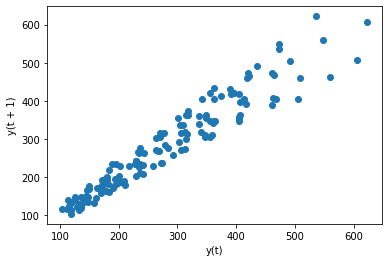

In [10]:

pd.plotting.lag_plot(data['Passengers'])

<AxesSubplot:xlabel='year', ylabel='Passengers'>

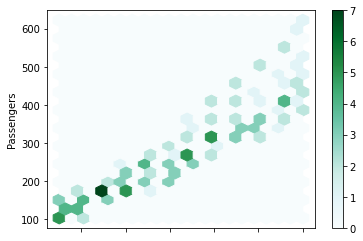

In [11]:

data.plot.hexbin(x='year',y='Passengers',gridsize=20)

<AxesSubplot:xlabel='month', ylabel='Passengers'>

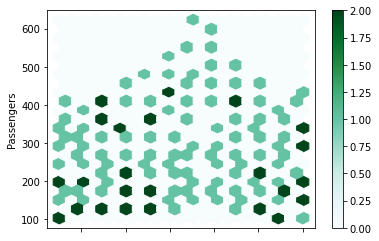

In [12]:
data.plot.hexbin(x='month',y='Passengers',gridsize=20)

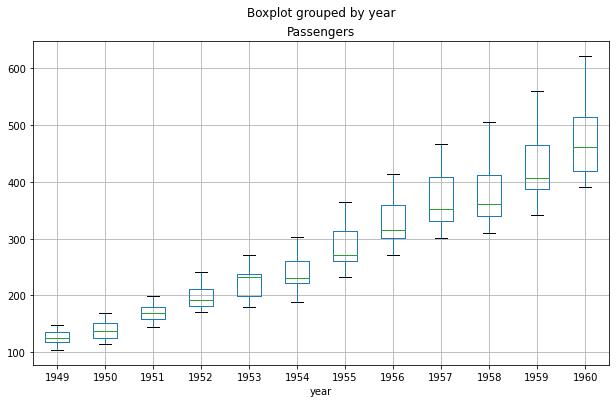

In [13]:

a=data.boxplot(figsize=(10,6),by='year',column='Passengers')

<AxesSubplot:xlabel='year', ylabel='Passengers'>

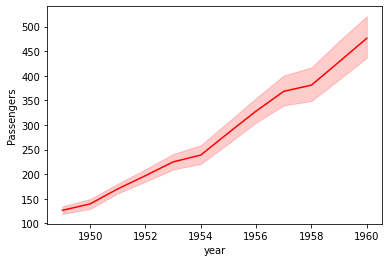

In [14]:

import seaborn as sns
sns.lineplot(x='year',y='Passengers',data=data,color='red')

<AxesSubplot:xlabel='month', ylabel='Passengers'>

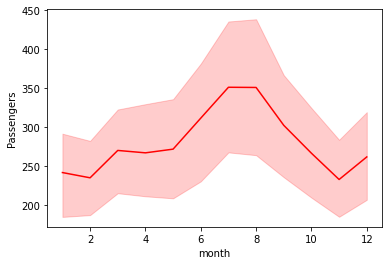

In [15]:

import seaborn as sns
sns.lineplot(x='month',y='Passengers',data=data,color='red')

In [16]:

train_df = data

In [17]:

train_len =  int(0.9*len(train_df))
test_len = len(train_df) - train_len

train,test = train_df.iloc[:train_len],train_df.iloc[train_len:len(train_df)]
print(train_df.shape,train.shape,test.shape)

(144, 3) (129, 3) (15, 3)


In [18]:

from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
rs_pas = RobustScaler()

t_c = ['year','month']

train.loc[:,t_c] = rs.fit_transform(train[t_c].to_numpy())
test.loc[:,t_c] = rs.transform(test[t_c].to_numpy())

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [19]:

train['Passengers'] = rs_pas.fit_transform(train[['Passengers']])
test['Passengers'] = rs_pas.transform(test[['Passengers']])

<ipython-input-19-8d79c30db599>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Passengers'] = rs_pas.fit_transform(train[['Passengers']])
<ipython-input-19-8d79c30db599>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Passengers'] = rs_pas.transform(test[['Passengers']])


In [20]:
test

,Passengers,year,month
129,1.030303,0.833333,0.666667
130,0.757576,0.833333,0.833333
131,1.018182,0.833333,1.000000
132,1.090909,1.000000,-0.833333
133,0.933333,1.000000,-0.666667
134,1.103030,1.000000,-0.500000
135,1.357576,1.000000,-0.333333
136,1.424242,1.000000,-0.166667
137,1.806061,1.000000,0.000000
138,2.333333,1.000000,0.166667


In [21]:
train

,Passengers,year,month
0,-0.757576,-0.833333,-0.833333
1,-0.721212,-0.833333,-0.666667
2,-0.636364,-0.833333,-0.500000
3,-0.654545,-0.833333,-0.333333
4,-0.703030,-0.833333,-0.166667
...,...,...,...
124,1.109091,0.833333,-0.166667
125,1.424242,0.833333,0.000000
126,1.884848,0.833333,0.166667
127,1.951515,0.833333,0.333333


In [22]:

train.to_numpy()
test.to_numpy()

array([[ 1.03030303,  0.83333333,  0.66666667],
       [ 0.75757576,  0.83333333,  0.83333333],
       [ 1.01818182,  0.83333333,  1.        ],
       [ 1.09090909,  1.        , -0.83333333],
       [ 0.93333333,  1.        , -0.66666667],
       [ 1.1030303 ,  1.        , -0.5       ],
       [ 1.35757576,  1.        , -0.33333333],
       [ 1.42424242,  1.        , -0.16666667],
       [ 1.80606061,  1.        ,  0.        ],
       [ 2.33333333,  1.        ,  0.16666667],
       [ 2.23636364,  1.        ,  0.33333333],
       [ 1.64242424,  1.        ,  0.5       ],
       [ 1.35757576,  1.        ,  0.66666667],
       [ 0.92727273,  1.        ,  0.83333333],
       [ 1.18181818,  1.        ,  1.        ]])

In [23]:

def create_dataset(x,y,time_steps=1):

    x_train,y_train = [],[]

    for i in range(len(x)-time_steps):
        v = x.iloc[i:(i+time_steps)].values

        x_train.append(v)
        y_train.append(y.iloc[i+time_steps])

    return np.array(x_train),np.array(y_train)

In [24]:
time_steps = 1

x_train,y_train = create_dataset(train,train.Passengers,time_steps)
x_test,y_test = create_dataset(test,test.Passengers,time_steps)

print(x_train.shape,y_train.shape)

(128, 1, 3) (128,)


In [25]:

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,LSTM ,Bidirectional,Dropout

In [26]:

model = Sequential()

model.add(Bidirectional(LSTM(128,
                            input_shape=(1,3))))

model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(loss='mse',optimizer='adam')

In [27]:
history = model.fit(x_train,y_train,
                   epochs=400,
                   batch_size=32,
                   validation_split=0.1,
                   shuffle=False 
                   )

Epoch 1/400
4/4 [==============================] - 4s 900ms/step - loss: 0.3466 - val_loss: 1.3742
Epoch 2/400
4/4 [==============================] - 0s 18ms/step - loss: 0.3124 - val_loss: 1.2704
Epoch 3/400
4/4 [==============================] - 0s 15ms/step - loss: 0.2912 - val_loss: 1.1678
Epoch 4/400
4/4 [==============================] - 0s 15ms/step - loss: 0.2660 - val_loss: 1.0686
Epoch 5/400
4/4 [==============================] - 0s 15ms/step - loss: 0.2416 - val_loss: 0.9734
Epoch 6/400
4/4 [==============================] - 0s 14ms/step - loss: 0.2226 - val_loss: 0.8821
Epoch 7/400
4/4 [==============================] - 0s 14ms/step - loss: 0.2027 - val_loss: 0.7946
Epoch 8/400
4/4 [==============================] - 0s 17ms/step - loss: 0.1848 - val_loss: 0.7107
Epoch 9/400
4/4 [==============================] - 0s 21ms/step - loss: 0.1645 - val_loss: 0.6306
Epoch 10/400
4/4 [==============================] - 0s 19ms/step - loss: 0.1463 - val_loss: 0.5544
Epoch 11/400
4/4 [

4/4 [==============================] - 0s 19ms/step - loss: 0.0214 - val_loss: 0.0882
Epoch 84/400
4/4 [==============================] - 0s 21ms/step - loss: 0.0210 - val_loss: 0.0877
Epoch 85/400
4/4 [==============================] - 0s 19ms/step - loss: 0.0207 - val_loss: 0.0878
Epoch 86/400
4/4 [==============================] - 0s 21ms/step - loss: 0.0214 - val_loss: 0.0883
Epoch 87/400
4/4 [==============================] - 0s 21ms/step - loss: 0.0210 - val_loss: 0.0888
Epoch 88/400
4/4 [==============================] - 0s 20ms/step - loss: 0.0207 - val_loss: 0.0901
Epoch 89/400
4/4 [==============================] - 0s 26ms/step - loss: 0.0203 - val_loss: 0.0913
Epoch 90/400
4/4 [==============================] - 0s 17ms/step - loss: 0.0215 - val_loss: 0.0917
Epoch 91/400
4/4 [==============================] - 0s 18ms/step - loss: 0.0197 - val_loss: 0.0915
Epoch 92/400
4/4 [==============================] - 0s 21ms/step - loss: 0.0196 - val_loss: 0.0911
Epoch 93/400
4/4 [=====

Epoch 165/400
4/4 [==============================] - 0s 16ms/step - loss: 0.0205 - val_loss: 0.0907
Epoch 166/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0197 - val_loss: 0.0902
Epoch 167/400
4/4 [==============================] - 0s 18ms/step - loss: 0.0196 - val_loss: 0.0906
Epoch 168/400
4/4 [==============================] - 0s 19ms/step - loss: 0.0191 - val_loss: 0.0916
Epoch 169/400
4/4 [==============================] - 0s 20ms/step - loss: 0.0195 - val_loss: 0.0928
Epoch 170/400
4/4 [==============================] - 0s 21ms/step - loss: 0.0202 - val_loss: 0.0939
Epoch 171/400
4/4 [==============================] - 0s 19ms/step - loss: 0.0199 - val_loss: 0.0949
Epoch 172/400
4/4 [==============================] - 0s 22ms/step - loss: 0.0203 - val_loss: 0.0952
Epoch 173/400
4/4 [==============================] - ETA: 0s - loss: 0.006 - 0s 17ms/step - loss: 0.0225 - val_loss: 0.0948
Epoch 174/400
4/4 [==============================] - 0s 16ms/step - loss: 0.

4/4 [==============================] - 0s 16ms/step - loss: 0.0181 - val_loss: 0.0893
Epoch 247/400
4/4 [==============================] - 0s 16ms/step - loss: 0.0195 - val_loss: 0.0903
Epoch 248/400
4/4 [==============================] - 0s 21ms/step - loss: 0.0199 - val_loss: 0.0901
Epoch 249/400
4/4 [==============================] - 0s 25ms/step - loss: 0.0206 - val_loss: 0.0904
Epoch 250/400
4/4 [==============================] - 0s 27ms/step - loss: 0.0192 - val_loss: 0.0909
Epoch 251/400
4/4 [==============================] - 0s 21ms/step - loss: 0.0194 - val_loss: 0.0914
Epoch 252/400
4/4 [==============================] - 0s 23ms/step - loss: 0.0190 - val_loss: 0.0910
Epoch 253/400
4/4 [==============================] - 0s 20ms/step - loss: 0.0195 - val_loss: 0.0908
Epoch 254/400
4/4 [==============================] - 0s 18ms/step - loss: 0.0189 - val_loss: 0.0908
Epoch 255/400
4/4 [==============================] - 0s 19ms/step - loss: 0.0192 - val_loss: 0.0914
Epoch 256/400


Epoch 328/400
4/4 [==============================] - 0s 16ms/step - loss: 0.0184 - val_loss: 0.0955
Epoch 329/400
4/4 [==============================] - 0s 19ms/step - loss: 0.0193 - val_loss: 0.0927
Epoch 330/400
4/4 [==============================] - 0s 18ms/step - loss: 0.0173 - val_loss: 0.0891
Epoch 331/400
4/4 [==============================] - 0s 17ms/step - loss: 0.0194 - val_loss: 0.0870
Epoch 332/400
4/4 [==============================] - 0s 15ms/step - loss: 0.0193 - val_loss: 0.0874
Epoch 333/400
4/4 [==============================] - 0s 16ms/step - loss: 0.0178 - val_loss: 0.0879
Epoch 334/400
4/4 [==============================] - 0s 14ms/step - loss: 0.0181 - val_loss: 0.0909
Epoch 335/400
4/4 [==============================] - 0s 12ms/step - loss: 0.0194 - val_loss: 0.0913
Epoch 336/400
4/4 [==============================] - 0s 14ms/step - loss: 0.0187 - val_loss: 0.0908
Epoch 337/400
4/4 [==============================] - 0s 14ms/step - loss: 0.0197 - val_loss: 0.0883


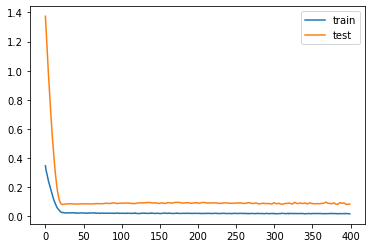

In [28]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()

In [29]:
x_test

array([[[ 1.03030303,  0.83333333,  0.66666667]],

       [[ 0.75757576,  0.83333333,  0.83333333]],

       [[ 1.01818182,  0.83333333,  1.        ]],

       [[ 1.09090909,  1.        , -0.83333333]],

       [[ 0.93333333,  1.        , -0.66666667]],

       [[ 1.1030303 ,  1.        , -0.5       ]],

       [[ 1.35757576,  1.        , -0.33333333]],

       [[ 1.42424242,  1.        , -0.16666667]],

       [[ 1.80606061,  1.        ,  0.        ]],

       [[ 2.33333333,  1.        ,  0.16666667]],

       [[ 2.23636364,  1.        ,  0.33333333]],

       [[ 1.64242424,  1.        ,  0.5       ]],

       [[ 1.35757576,  1.        ,  0.66666667]],

       [[ 0.92727273,  1.        ,  0.83333333]]])

In [30]:
y_pred = model.predict(x_test)
ot = rs_pas.inverse_transform(y_pred)
ot

array([[425.35144],
       [389.42926],
       [399.16254],
       [445.96558],
       [433.91547],
       [468.1937 ],
       [510.91766],
       [522.22217],
       [573.7222 ],
       [640.3704 ],
       [614.59595],
       [526.29236],
       [481.81134],
       [426.75903]], dtype=float32)

In [31]:
y_test_inv = rs_pas.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = rs_pas.inverse_transform(y_pred)
y_pred_inv

array([[425.35144],
       [389.42926],
       [399.16254],
       [445.96558],
       [433.91547],
       [468.1937 ],
       [510.91766],
       [522.22217],
       [573.7222 ],
       [640.3704 ],
       [614.59595],
       [526.29236],
       [481.81134],
       [426.75903]], dtype=float32)

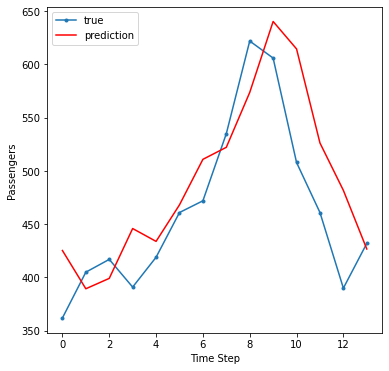

In [32]:
plt.figure(figsize=(6,6))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Passengers')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [33]:

model.save('airline4-copy1.h5')

In [34]:

import math
trainScore = model.evaluate(x_train,y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.02 MSE (0.15 RMSE)
Test Score: 0.10 MSE (0.31 RMSE)


In [35]:
y_test_inv = rs_pas.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = rs_pas.inverse_transform(y_pred)

arr_1 = np.array(y_test_inv)
arr_2 = np.array(y_pred_inv)

actual = pd.DataFrame(data=arr_1.flatten(),columns=["actual"])
predicted = pd.DataFrame(data=arr_2.flatten(),columns = ["predicted"])

In [36]:
final = pd.concat([actual,predicted],axis=1)
final.head()

,actual,predicted
0,362.0,425.351440
1,405.0,389.429260
2,417.0,399.162537
3,391.0,445.965576
4,419.0,433.915466


In [37]:
import joblib
joblib.dump(rs_pas,"scalar")

['scalar']

In [38]:
from tensorflow.keras.models import load_model
import numpy as np 
import joblib
m = load_model("airline4-copy1.h5")
sc = joblib.load("scalar")
test = [1,2,3]
test = np.array(test)

test = test.reshape(-1,1)
test = sc.transform(test)
test = np.reshape(test, (1,1,3))
print(test.shape)
f = m.predict((test))
print(f)
sc.inverse_transform(f)


(1, 1, 3)
[[-1.398203]]


array([[6.296509]], dtype=float32)